<a href="https://colab.research.google.com/github/Dany511/Dany1_Portfolio/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/Hotel Bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.shape

(119390, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
d={'January':'1','February':'2','March':'3','April':'4','May':'5','June':'6','July':'7','August':'8','September':'9','October':'10','November':'11','December':'12'}

In [ ]:
df['arrival_date_month']=df['arrival_date_month'].map(d)
df['arrival_date']=df['arrival_date_year'].astype(str)+'-'+df['arrival_date_month']+'-'+df['arrival_date_day_of_month'].astype(str)


In [ ]:
df['arrival_date']=pd.to_datetime(df['arrival_date'])
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'])
df['len_of_stay']=(df['reservation_status_date']-df['arrival_date']).dt.days

In [ ]:
d=df[df['is_canceled']==0]
d.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,len_of_stay,total_rate
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0,0.0
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0,0.0
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1,75.0
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1,75.0
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,2,196.0


In [ ]:
d=d[d['len_of_stay']>0]
d=d[d['adr']>0]

In [ ]:
# Optimal Length of stay in order to get best daily rates
dp=d.groupby(['len_of_stay'])[['adr']].mean().sort_values('adr')
dp.head(10)

,adr
len_of_stay,
38,0.260000
57,8.340000
56,28.790000
42,35.520000
35,39.876000
45,42.110000
25,55.065714
28,57.078636
29,68.200000


In [ ]:
df.groupby('customer_type')['is_canceled'].count()

customer_type
Contract            4076
Group                577
Transient          89613
Transient-Party    25124
Name: is_canceled, dtype: int64

In [ ]:
# Best time of year to book a room in hotel
df.groupby(['arrival_date_month'])[['days_in_waiting_list','adr']].mean().sort_values(['adr','days_in_waiting_list'])

,days_in_waiting_list,adr
arrival_date_month,,
1,2.526396,70.361241
2,0.764874,73.582276
11,1.767736,73.794962
3,1.376965,80.679646
12,3.007522,81.076776
10,4.598835,87.908879
4,3.012445,100.380790
9,4.221926,105.049657
5,4.339072,108.695516


In [ ]:
# Splitting the data w.r.t arrival_date_year
df_15=df[df['arrival_date_year']==2015]
df_16=df[df['arrival_date_year']==2016]
df_17=df[df['arrival_date_year']==2017]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


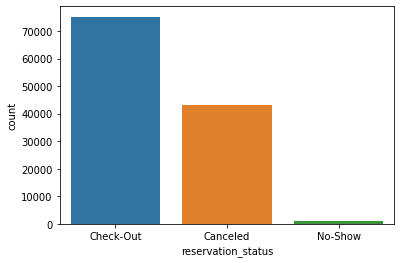

In [ ]:
sns.countplot(df['reservation_status'])

In [ ]:
df_15['reservation_status'].value_counts()

Check-Out    13854
Canceled      7951
No-Show        191
Name: reservation_status, dtype: int64

In [ ]:
df_16['reservation_status'].value_counts()

Check-Out    36370
Canceled     19669
No-Show        668
Name: reservation_status, dtype: int64

In [ ]:
df_17['reservation_status'].value_counts()

Check-Out    24942
Canceled     15397
No-Show        348
Name: reservation_status, dtype: int64

In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
df_16.groupby(['arrival_date_month'])[['days_in_waiting_list']].agg('sum').sort_values('days_in_waiting_list')

,days_in_waiting_list
arrival_date_month,
11,217
12,2232
7,2592
2,5169
8,5533
3,11311
1,14578
6,20109
4,30678


In [ ]:
df_17.groupby(['arrival_date_month'])[['days_in_waiting_list']].agg('sum').sort_values('days_in_waiting_list')

,days_in_waiting_list
arrival_date_month,
8,0
7,319
1,401
2,1002
6,1278
5,1667
3,2175
4,2727


In [ ]:
d=df[df['is_canceled']==0]

In [ ]:
d[['len_of_stay','adr']]

,len_of_stay,adr
0,0,0.00
1,0,0.00
2,1,75.00
3,1,75.00
4,2,98.00
...,...,...
119385,7,96.14
119386,7,225.43
119387,7,157.71
119388,7,104.40


In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75166 entries, 0 to 119389
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           75166 non-null  object        
 1   is_canceled                     75166 non-null  int64         
 2   lead_time                       75166 non-null  int64         
 3   arrival_date_year               75166 non-null  int64         
 4   arrival_date_month              75166 non-null  object        
 5   arrival_date_week_number        75166 non-null  int64         
 6   arrival_date_day_of_month       75166 non-null  int64         
 7   stays_in_weekend_nights         75166 non-null  int64         
 8   stays_in_week_nights            75166 non-null  int64         
 9   adults                          75166 non-null  int64         
 10  children                        75166 non-null  float64       
 11  b